In [3]:
%matplotlib inline
# automatically reload modules when they have changed
#import sys
%load_ext autoreload
%autoreload 2
import keras
import keras
import keras_retinanet
from keras_maskrcnn import models
from keras_maskrcnn.utils.visualization import draw_mask
from keras_retinanet.utils.visualization import draw_box, draw_caption, draw_annotations
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.colors import label_color
# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
# set tf backend to allow memory to grow, instead of claiming everything\n",
import tensorflow as tf
def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)
# use this environment flag to change which GPU to use
#os.environ[\"CUDA_VISIBLE_DEVICES\"] = \"1\"
# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# adjust this to point to your downloaded/trained model
model_path = os.path.join('resnet50_csv_05.h5')
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
#print(model.summary())
# load label to names mapping for visualization purposes\n",
labels_to_names = {0: 'leftreardoor', 1: 'leftquarterpanel'}

/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:312: UserWarning: Output "filtered_detections" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "filtered_detections" during training.
  sample_weight_mode=sample_weight_mode)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:312: UserWarning: Output "mask_submodel" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "mask_submodel" during training.
  sample_weight_mode=sample_weight_mode)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


processing time:  0.40189170837402344


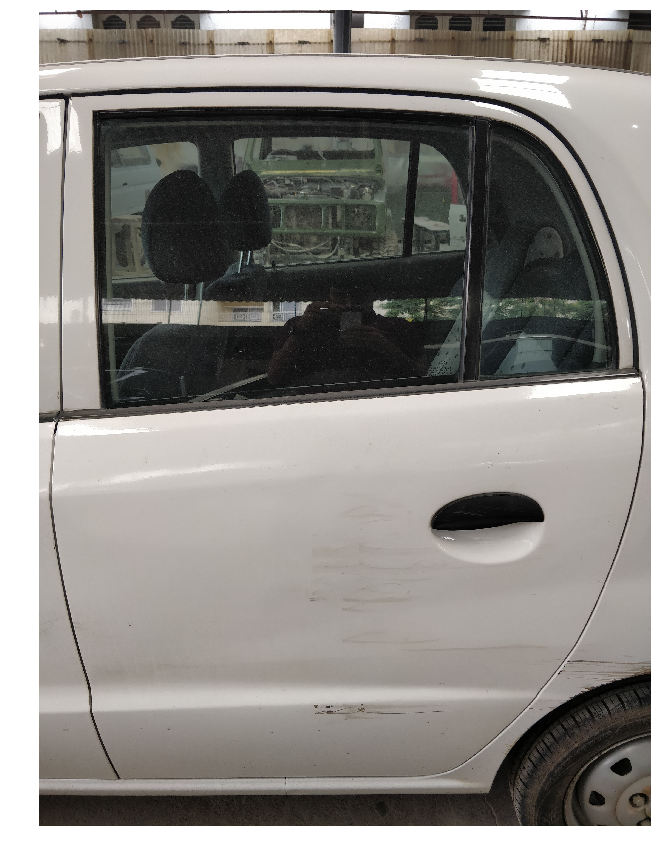

In [21]:
# load image\n",
image = read_image_bgr('image1.jpg')
# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
  
# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)
  
# process image
start = time.time()
outputs = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)
boxes  = outputs[-4][0]
scores = outputs[-3][0]
labels = outputs[-2][0]
masks  = outputs[-1][0]
# correct for image scale
boxes /= scale
# visualize detections
for box, score, label, mask in zip(boxes, scores, labels, masks):
    if score < 0.001:
        break
    color = label_color(label)
    b = box.astype(int)
    draw_box(draw, b, color=color)
    mask = mask[:, :, label]
    draw_mask(draw, b, mask, color=label_color(label))
    caption = "{} {:.3f}".format(labels_to_names[label], score)
#draw_caption(draw, b, caption)\n",
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()